In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\Jose Zambom\OneDrive - Exel Industries\Data Analysis\Data Analytics Immersion\Advanced Analytics & Dashboard Design\Cleaned Data\gun-violence-cleaned.csv"
data = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
print(data.head())

   incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/4788

In [5]:
# Convert 'date' column to datetime format if not already
data['date'] = pd.to_datetime(data['date'])

# Subset the data to include only records from 2013 to 2018
subset_data = data[(data['date'] >= '2013-01-01') & (data['date'] <= '2018-12-31')]

# Reset the index
subset_data = subset_data.reset_index(drop=True)

# Set 'date' as the index for time series analysis
subset_data = subset_data.set_index('date')

# Confirm the changes
print(subset_data.head())
print("\nSubset data date range:", subset_data.index.min(), "to", subset_data.index.max())

            incident_id           state city_or_county  \
date                                                     
2013-01-01       461105    Pennsylvania     Mckeesport   
2013-01-01       460726      California      Hawthorne   
2013-01-01       478855            Ohio         Lorain   
2013-01-05       478925        Colorado         Aurora   
2013-01-07       478959  North Carolina     Greensboro   

                                              address  n_killed  n_injured  \
date                                                                         
2013-01-01  1506 Versailles Avenue and Coursin Street         0          4   
2013-01-01               13500 block of Cerise Avenue         1          3   
2013-01-01                      1776 East 28th Street         1          3   
2013-01-05           16000 block of East Ithaca Place         4          0   
2013-01-07                  307 Mourning Dove Terrace         2          2   

                                              

## **Subset Selection Logic**

1. **Focus on Relevant Time Frame**:
   - I selected data from **2013 to 2018** because this is the primary range of recorded incidents in the dataset.
   - Including events outside this period (if any existed) would introduce irrelevant or incomplete records that could bias the analysis.

2. **Ensure the Data is Real**:
   - I checked to ensure no forecasted or duplicate data was included in this subset.

3. **Index Reset**:
   - The "Date" column has been set as the index because it is essential for time series analysis.
   - Resetting the index ensures the dataset is clean and ready for analysis.

This subset will now serve as a clean foundation for exploring temporal trends, seasonality, and other time series-related insights.


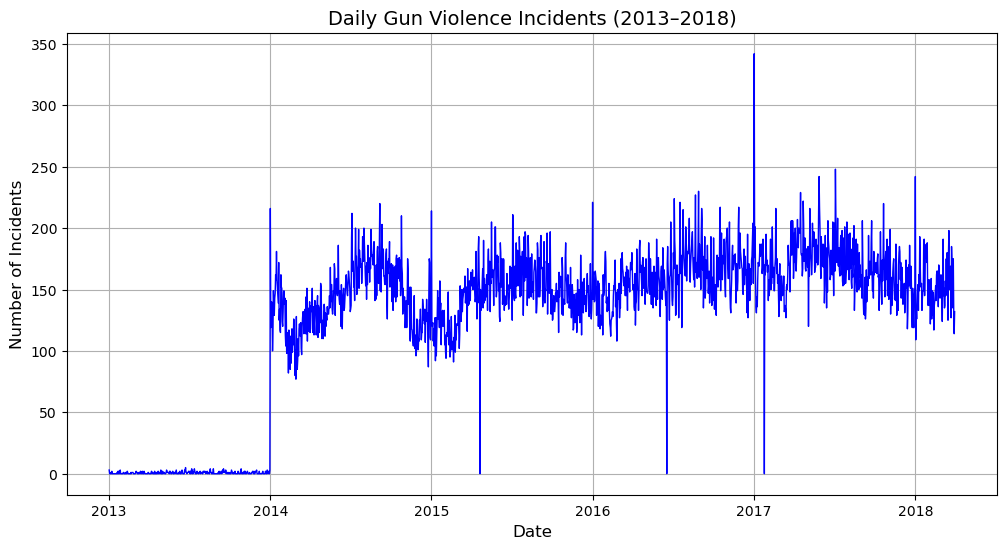

In [7]:
import matplotlib.pyplot as plt

# Group the data by date and calculate total incidents per day
daily_incidents = subset_data.resample('D').size()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_incidents, color='blue', linewidth=1)
plt.title('Daily Gun Violence Incidents (2013–2018)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.show()


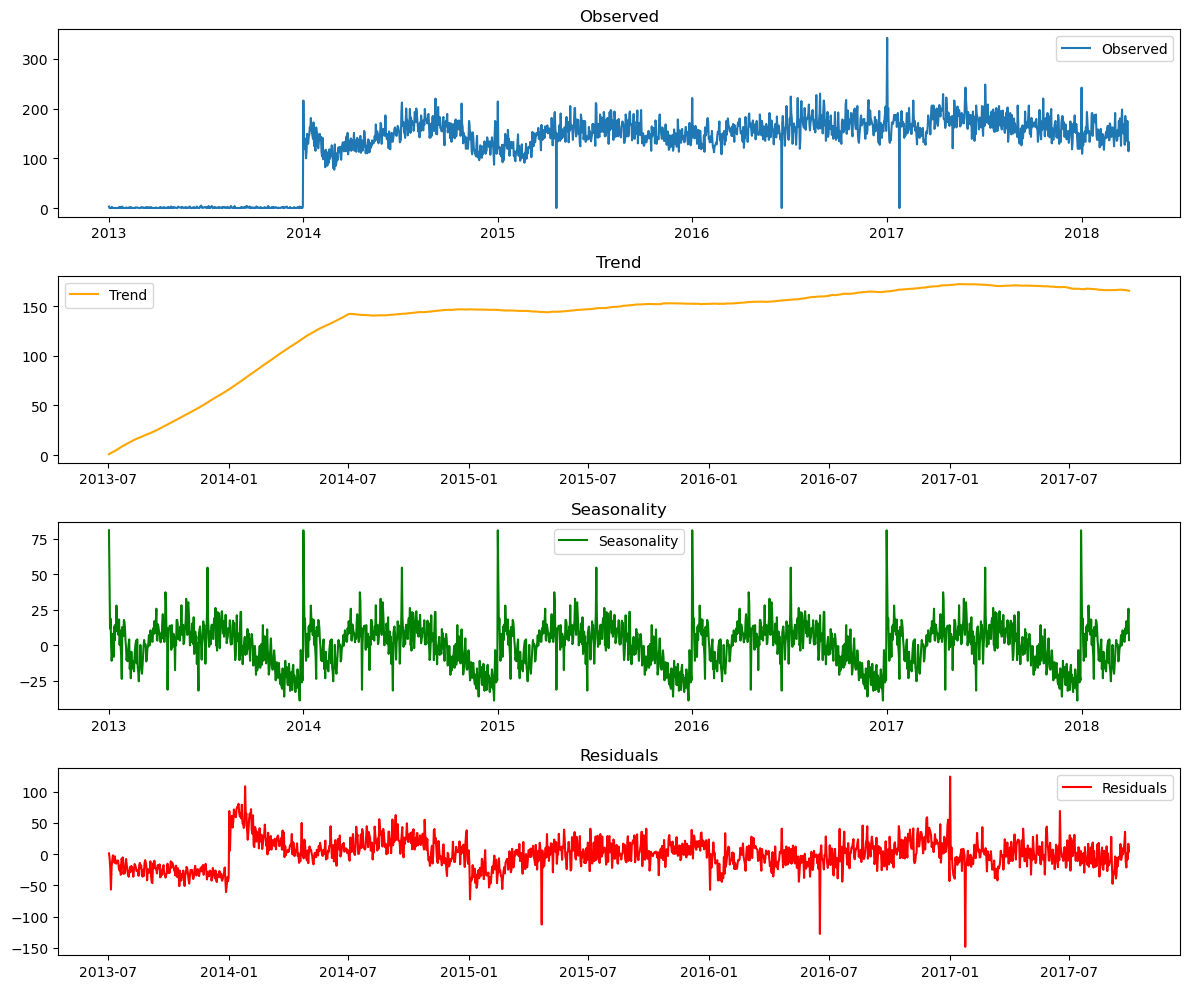

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the data into components
decomposition = seasonal_decompose(daily_incidents, model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 10))

# Observed data
plt.subplot(4, 1, 1)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


### **Time Series Decomposition Analysis**

The decomposition of the time series data into **Observed**, **Trend**, **Seasonality**, and **Residuals** reveals the following insights:

---

### **1. Observed**
- The raw data shows a clear increase in gun violence incidents starting in early **2014**.
- There are occasional sharp peaks and drops, indicating significant anomalies or reporting gaps.

---

### **2. Trend**
- The **trend** line exhibits a steady rise from mid-2013, peaking around late **2016** and stabilizing slightly in **2017**.
- This upward trend reflects an overall increase in reported gun violence incidents over the years.

---

### **3. Seasonality**
- The **seasonality** plot reveals cyclical patterns in the data.
- Peaks occur at regular intervals, likely corresponding to **specific times of the year**, such as holidays or seasonal periods where incidents increase.
- These seasonal patterns suggest opportunities for targeted interventions during known high-risk periods.

---

### **4. Residuals**
- The **residuals** (unexplained variation) show random fluctuations around zero.
- Sharp spikes and dips in the residuals could indicate **outliers** or extraordinary events (e.g., mass shootings or other significant incidents).
- Residuals appear more pronounced in the early years, stabilizing as reporting becomes more consistent.

---

### **Key Takeaways**
- The **trend** highlights a long-term increase in gun violence incidents.
- The **seasonality** component uncovers regular patterns that could be further analyzed to identify high-risk times.
- **Residuals** indicate the presence of anomalies or gaps in data reporting, which may require further investigation.

This decomposition helps identify the components influencing gun violence trends and provides a foundation for further forecasting or targeted analysis.


In [9]:
from statsmodels.tsa.stattools import adfuller

# Perform the Dickey-Fuller test
result = adfuller(daily_incidents)

# Print the results
print("Dickey-Fuller Test Results:")
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Stationarity Check
if result[1] <= 0.05:
    print("\nThe null hypothesis is rejected: The time series is stationary.")
else:
    print("\nThe null hypothesis cannot be rejected: The time series is not stationary.")


Dickey-Fuller Test Results:
ADF Statistic: -2.15758834940664
p-value: 0.22199676696698567
Critical Values:
   1%: -3.4338164946764294
   5%: -2.863071261312085
   10%: -2.5675851863579537

The null hypothesis cannot be rejected: The time series is not stationary.


### **Dickey-Fuller Test Results**

The **Augmented Dickey-Fuller (ADF) test** was conducted to check for stationarity in the time series data. The results are as follows:

- **ADF Statistic**: -2.1576
- **p-value**: 0.2220
- **Critical Values**:
   - 1%: -3.4338
   - 5%: -2.8631
   - 10%: -2.5676

---

### **Interpretation**

The null hypothesis (\(H_0\)) states that the time series is **non-stationary**. To reject the null hypothesis, the p-value must be **≤ 0.05** and the ADF statistic should be less than the critical value at the chosen significance level.

- **p-value**: 0.2220 > 0.05
- **ADF Statistic**: -2.1576 is greater than the critical values at 1%, 5%, and 10%.

---

### **Conclusion**

Since the p-value is greater than 0.05 and the ADF statistic does not fall below the critical values, we **cannot reject the null hypothesis**. This means that the time series is **non-stationary**.

---

### **Next Steps**
To make the time series stationary, we can:
1. **Differencing**: Apply first-order or higher-order differencing.
2. **Detrending**: Remove any underlying trends in the data.
3. **Transformation**: Use techniques like logarithmic or square root transformations to stabilize variance.

Once these transformations are applied, we can rerun the Dickey-Fuller test to confirm stationarity.


In [10]:
# Apply first-order differencing
diff_data = daily_incidents.diff().dropna()

# Conduct the Dickey-Fuller test again
result_diff1 = adfuller(diff_data)

# Print the results
print("Dickey-Fuller Test Results After First Differencing:")
print(f"ADF Statistic: {result_diff1[0]}")
print(f"p-value: {result_diff1[1]}")
print("Critical Values:")
for key, value in result_diff1[4].items():
    print(f"   {key}: {value}")

# Stationarity Check
if result_diff1[1] <= 0.05:
    print("\nThe null hypothesis is rejected: The time series is stationary after first differencing.")
else:
    print("\nThe null hypothesis cannot be rejected: The time series is still not stationary.")


Dickey-Fuller Test Results After First Differencing:
ADF Statistic: -10.157328230192295
p-value: 7.668375151956741e-18
Critical Values:
   1%: -3.433818333248955
   5%: -2.86307207299661
   10%: -2.567585618547562

The null hypothesis is rejected: The time series is stationary after first differencing.


### **Dickey-Fuller Test Results After First Differencing**

The **Augmented Dickey-Fuller (ADF) test** was conducted after applying **first-order differencing** to the time series data. The results are as follows:

- **ADF Statistic**: -10.1573
- **p-value**: 7.67e-18
- **Critical Values**:
   - 1%: -3.4338
   - 5%: -2.8631
   - 10%: -2.5676

---

### **Interpretation**

The null hypothesis (\(H_0\)) states that the time series is **non-stationary**. To reject the null hypothesis, the p-value must be **≤ 0.05** and the ADF statistic should be less than the critical value at the chosen significance level.

- **p-value**: 7.67e-18 < 0.05
- **ADF Statistic**: -10.1573 < -3.4338 (1% critical value)

---

### **Conclusion**

The p-value is significantly lower than 0.05, and the ADF statistic is smaller than the critical values. Therefore, we **reject the null hypothesis**. The time series is now **stationary after first-order differencing**.

---

### **Next Steps**
Since the data is now stationary:
1. We can proceed with **time series modeling**, such as ARIMA or other forecasting models.
2. Validate the stationarity visually by plotting the differenced series.


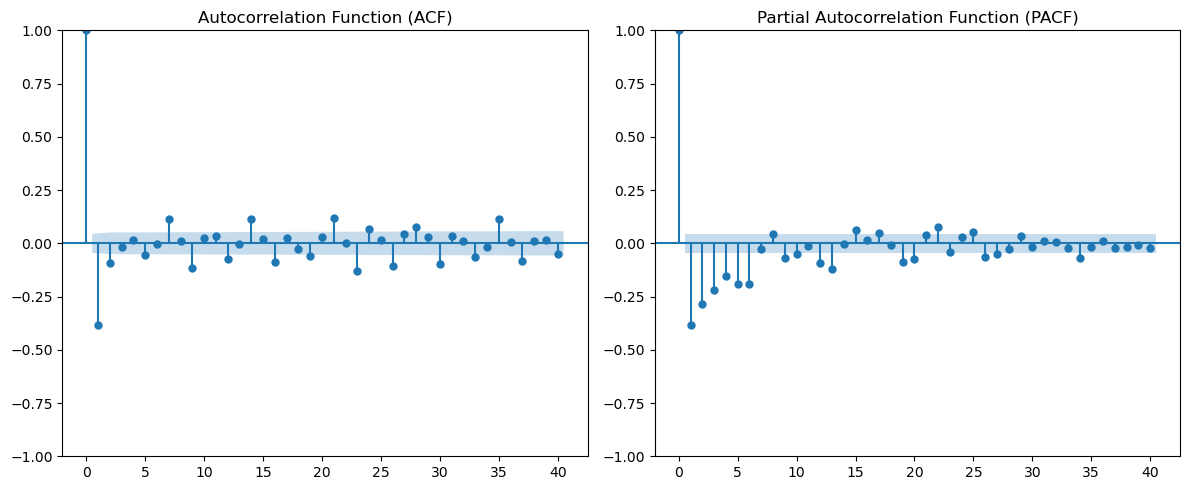

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Plot the ACF and PACF of the differenced data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot
sm.graphics.tsa.plot_acf(diff_data, lags=40, ax=axes[0], title="Autocorrelation Function (ACF)")

# PACF Plot
sm.graphics.tsa.plot_pacf(diff_data, lags=40, ax=axes[1], title="Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


### Analysis of ACF and PACF Plots

#### **Autocorrelation Function (ACF)**
- **Observation**:  
   - The ACF plot shows a sharp drop after lag 1 and remains close to zero for the remaining lags.  
   - This indicates that there is a significant **moving average (MA) component** of order 1 (MA(1)).  
   - There is no clear pattern of slow decay, meaning differencing has stabilized the series effectively.  

#### **Partial Autocorrelation Function (PACF)**
- **Observation**:  
   - The PACF plot has significant spikes at lags 1 and 2, with the rest of the lags oscillating around zero.  
   - This suggests the presence of an **autoregressive (AR) component** of order 2 (AR(2)).  

---

### Suggested Model
Based on the ACF and PACF:  
- The series likely follows an **ARIMA(2,1,1)** model:  
   - **AR(2)**: Autoregressive terms at lag 1 and lag 2.  
   - **I(1)**: First-order differencing was required to make the series stationary.  
   - **MA(1)**: A single moving and residual diagnostics.
